<a href="https://colab.research.google.com/github/ajak-cp/lab-5-ajak-cp/blob/main/DATA_301_Lab_5_Phase_2_Sucheen_Sundaram%2C_Ava_Jakusovsky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Authorship of the Federalist Papers

The _Federalist Papers_ were a set of 85 essays published between 1787 and 1788 to promote the ratification of the United States Constitution. They were originally published under the pseudonym "Publius". Although the identity of the authors was a closely guarded secret at the time, most of the papers have since been conclusively attributed to one of Hamilton, Jay, or Madison. The known authorships can be found in `https://dlsun.github.io/pods/data/federalist/authorship.csv`.

For 15 of the papers, however, the authorships remain disputed. (These papers can be identified from the `authorship.csv` file because the "Author" field is blank.) In this analysis, you will use the papers with known authorship to predict the authorships of the disputed papers. The text of each paper is available at `https://dlsun.github.io/pods/data/federalist/x.txt`, where `x` is the number of the paper (i.e., a number from 1 to 85). The name of the file indicates the number of the paper.

## Question 1

When analyzing an author's style, common words like "the" and "on" are actually more useful than rare words like "hostilities". That is because rare words typically signify context. Context is useful if you are trying to find documents about similar topics, but not so useful if you are trying to identify an author's style because different authors can write about the same topic. For example, both Dr. Seuss and Charles Dickens used rare words like "chimney" and "stockings" in _How the Grinch Stole Christmas_ and _A Christmas Carol_, respectively. But they used common words very differently: Dickens used the word "upon" over 100 times, while Dr. Seuss did not use "upon" even once.

Read in the Federalist Papers. Convert each one into a vector of term frequencies. In order to restrict to common words, include only the top 50 words across the corpus. (Because we are restricting to the most common words already, there is no reason to reweight them using TF-IDF.)

In [ ]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
strings = []
for i in range(1, 86):
  strings.append(requests.get("https://dlsun.github.io/pods/data/federalist/" + str(i) + ".txt", "r").text)
papers = pd.Series(strings, index=range(1, 86))
df_author = pd.read_csv("https://dlsun.github.io/pods/data/federalist/authorship.csv")

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import *
from sklearn.metrics.pairwise import *
df_papers = (papers.
 str.lower().
 str.replace("[^\w\s]", " ").  # replace non-alphanumeric characters by whitespace
 str.split()).apply(Counter).to_frame()
df_author.index = df_author["Paper"]
df_papers["Author"] = df_author["Author"]

def Convert(tup, di):
    di = dict(tup)
    return di
      
for i in range(1,86,1):
  df_papers[0][i] = Convert(df_papers[0][i].most_common(50),df_papers[0][i])
  print("The length of the dictionary #"+str(i)+" is " + str(len(df_papers[0][i])))


The length of the dictionary #1 is 50
The length of the dictionary #2 is 50
The length of the dictionary #3 is 50
The length of the dictionary #4 is 50
The length of the dictionary #5 is 50
The length of the dictionary #6 is 50
The length of the dictionary #7 is 50
The length of the dictionary #8 is 50
The length of the dictionary #9 is 50
The length of the dictionary #10 is 50
The length of the dictionary #11 is 50
The length of the dictionary #12 is 50
The length of the dictionary #13 is 50
The length of the dictionary #14 is 50
The length of the dictionary #15 is 50
The length of the dictionary #16 is 50
The length of the dictionary #17 is 50
The length of the dictionary #18 is 50
The length of the dictionary #19 is 50
The length of the dictionary #20 is 50
The length of the dictionary #21 is 50
The length of the dictionary #22 is 50
The length of the dictionary #23 is 50
The length of the dictionary #24 is 50
The length of the dictionary #25 is 50
The length of the dictionary #26 i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
df_papers

,0,Author
1,"{'the': 133, 'of': 106, 'to': 72, 'and': 40, '...",Hamilton
2,"{'the': 107, 'of': 83, 'and': 83, 'to': 53, 't...",Jay
3,"{'the': 93, 'of': 62, 'and': 60, 'to': 56, 'or...",Jay
4,"{'and': 90, 'the': 86, 'of': 72, 'to': 51, 'it...",Jay
5,"{'and': 72, 'the': 66, 'of': 53, 'to': 45, 'wo...",Jay
...,...,...
81,"{'the': 389, 'of': 248, 'to': 163, 'in': 135, ...",Hamilton
82,"{'the': 168, 'of': 94, 'to': 83, 'and': 41, 'i...",Hamilton
83,"{'the': 485, 'of': 331, 'to': 219, 'in': 213, ...",Hamilton
84,"{'the': 390, 'of': 293, 'to': 140, 'be': 94, '...",Hamilton


## Question 2
Make a visualization that summarizes the most common words used by Hamilton, Madison, and Jay.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


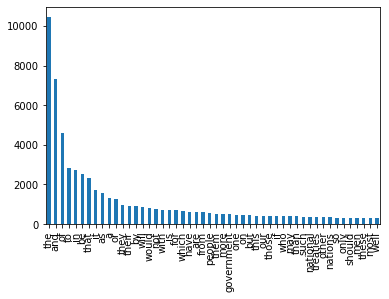

In [ ]:
from collections import Counter
df_papers = (papers.
 str.lower().
 str.replace("[^\w\s]", " ").  # replace non-alphanumeric characters by whitespace
 str.split()).apply(Counter).to_frame()
df_author.index = df_author["Paper"]
df_papers["Author"] = df_author["Author"]
counter = (papers.
 str.lower().
 str.replace("[^\w\s]", " ").  # replace non-alphanumeric characters by whitespace
 str.split()).apply(Counter)

words = pd.DataFrame(list(counter)).fillna(0)
words.index = df_author.index
words["Author"] = df_author["Author"]
top = 50
words[words["Author"] == "Hamilton"].sum()[:-1].sort_values(ascending=False)[:top].plot.bar()
words[words["Author"] == "Madison"].sum()[:-1].sort_values(ascending=False)[:top].plot.bar()
words[words["Author"] == "Jay"].sum()[:-1].sort_values(ascending=False)[:top].plot.bar()

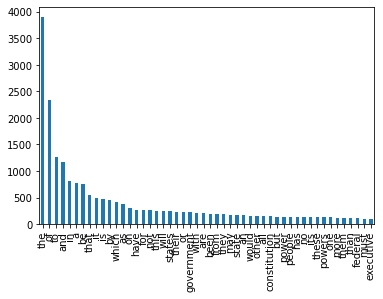

In [ ]:
words[words["Author"] == "Madison"].sum()[:-1].sort_values(ascending=False)[:top].plot.bar()

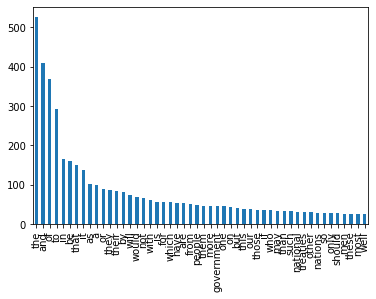

In [ ]:
words[words["Author"] == "Jay"].sum()[:-1].sort_values(ascending=False)[:top].plot.bar()

All used "the" most frequently, usually followed by "and" and "of", but after the 6th or so weord, their vocabulary diversifies.

## Question 3

For each of the documents with disputed authorships, find the 5 most similar documents with _known_ authorships, using cosine distance on the term frequencies. Use the authors of these 5 most similar documents to predict the author of each disputed document. (For example, if 3 of the 5 closest documents were written by Hamilton, 1 by Madison, and 1 by Jay, then we would predict that the disputed document was written by Hamilton.)

Sucheen's Model:

In [ ]:
from sklearn.feature_extraction.text import *
from sklearn.metrics.pairwise import *
papers_known = df_papers
known_text = papers[papers_known.index]
vectorizer = TfidfVectorizer(norm=None)
vectorizer.fit(known_text)
transformed = vectorizer.transform(known_text)
distance_df = pd.DataFrame(cosine_distances(transformed))
papers_arr = []
df_unknown = df_author[df_author["Author"].isna()]
not_null_df_index = [i for i in distance_df.index if i not in df_unknown.index]
filtered = distance_df.loc[not_null_df_index]
for col in df_unknown.index:
  val = filtered[col].sort_values().index[1:6]
  papers_arr.append(val+1)
vals = []
for i in range(len(papers_arr)):
  value = df_papers.loc[papers_arr[i]]["Author"].value_counts().idxmax()
  vals.append(value)
pd.Series(vals, df_unknown.index)

Paper
18     Madison
19     Madison
20    Hamilton
49     Madison
50     Madison
51     Madison
52     Madison
53    Hamilton
54     Madison
55     Madison
56     Madison
57     Madison
58    Hamilton
62     Madison
63    Hamilton
dtype: object

Ava's Model:

In [ ]:
df_fed = pd.read_csv('https://dlsun.github.io/pods/data/federalist/authorship.csv')
null_list = [17,18,19,48,49,50,51,52,53,54,55,56,57,61,62]
fed_dir =  'https://dlsun.github.io/pods/data/federalist/'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
papers = []

for i in range(1,86,1):
    papers.append(str(i)+'.txt')

fed_papes = pd.Series()
for paper in papers:
  response = requests.get(fed_dir+paper,"r")
  fed_papes[paper[:-4]] = response.text
fed_papes = fed_papes.str.replace("'", "").str.lower().str.replace("[^\w\s]", " ")
vec = TfidfVectorizer(norm=None) # Do not normalize.
vec.fit(fed_papes) # This determines the vocabulary.
tf_idf_sparse = vec.transform(fed_papes)

from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
sims = cosine_distances(tf_idf_sparse)
import numpy as np
import math as math
import heapq

def isNaN(string):
    return string != string

for row in null_list:
  author = {'Hamilton':0,'Madison':0,'Jay':0} #track similars
  max_val = heapq.nsmallest(10,sims[row])[1:] #get 10 largest values from cosine sim
  i = 0
  count = 0
  while count<5: #ensure we check 5
  #take biggest cosine sim, get the index, pull that row from df
    auth = df_fed.iloc[np.where(sims[row]==max_val[i])]['Author']
    #if it is a known author, increase count because we cross checked one author
    if not isNaN(auth.item()):
      if auth.item() == 'Madison':
        author['Madison'] += 1
        count = count + 1
      elif auth.item() == 'Hamilton':
        author['Hamilton'] += 1
        count = count + 1
      elif auth.item() == 'Jay':
        author['Jay'] += 1
        count = count + 1
      else:
        print('Check again, something is weird')
    #else try the next value
    else:
      i = i+1
  print(max(author, key=author.get)+' probably wrote paper #'+str(row+1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


Madison probably wrote paper #18
Madison probably wrote paper #19
Madison probably wrote paper #20
Madison probably wrote paper #49
Madison probably wrote paper #50
Madison probably wrote paper #51
Madison probably wrote paper #52
Hamilton probably wrote paper #53
Madison probably wrote paper #54
Hamilton probably wrote paper #55
Hamilton probably wrote paper #56
Hamilton probably wrote paper #57
Madison probably wrote paper #58
Hamilton probably wrote paper #62
Madison probably wrote paper #63


Sucheen and I approached the model in two ways, but both had a 2:1 correct:incorrect ratio, which we found interesting. I predicted with all texts in model, and him only known. We had differences in our predictions, but we had the same number correct in the end. In the future, it would be interesting to run a third model, and perhaps make a prediction based off 3 model predictions to get the most accuracy.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 5 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.